# Sine wave with gaussian noise

## Build Signal

In [10]:
import numpy as np
t = np.arange(10000)/1000
y_true = 3.0 * np.sin(2 * t + 0.5 * np.pi)
gaussian_noise = np.random.normal(size = t.shape[0])
observed_signal = y_true + gaussian_noise 

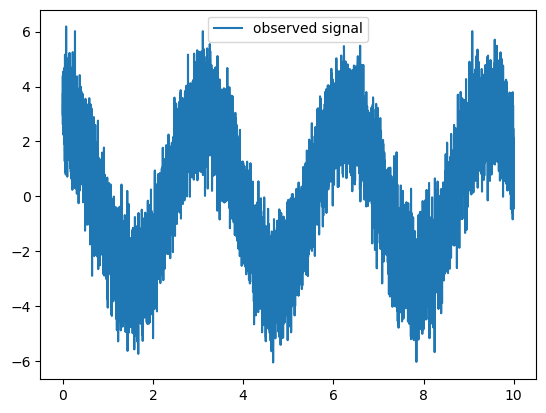

In [13]:
import matplotlib.pyplot as plt 

plt.plot(t, observed_signal, label='observed signal')
plt.legend()

## Parameter Estimation

Priors for unknown parameters:
- A -> Normal
- f -> Normal
- phi -> Uniform
- sigma -> HalfNormal

Likelihood: 
- Normal

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [A, f, phi, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


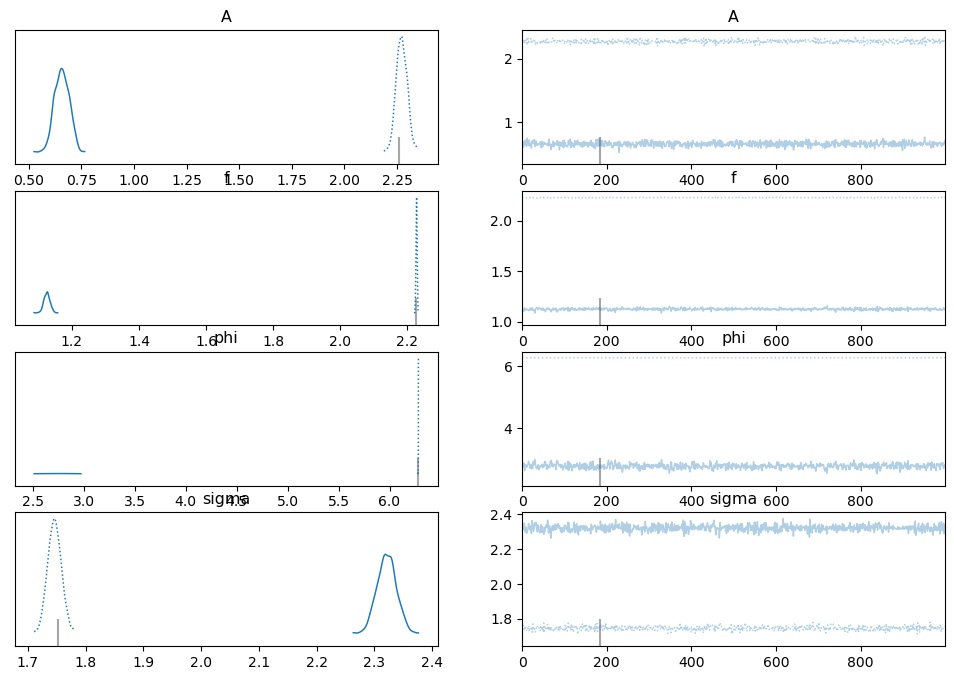

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
A      1.465  0.807   0.608    2.310      0.568    0.481       3.0      84.0   
f      1.676  0.551   1.115    2.231      0.388    0.328       3.0      60.0   
phi    4.521  1.763   2.670    6.283      1.241    1.050       3.0      97.0   
sigma  2.034  0.288   1.726    2.345      0.203    0.171       3.0      74.0   

       r_hat  
A       1.83  
f       1.83  
phi     1.83  
sigma   1.83  


In [14]:
import pymc as pm

with pm.Model() as model:
    
    A = pm.Normal('A', mu=1.0, sigma=5.0)      
    f = pm.Normal('f', mu=2.0, sigma=1.0)      
    phi = pm.Uniform('phi', lower=0, upper=2*np.pi)
    sigma = pm.HalfNormal('sigma', sigma=1.0)  

    # Expected value of the signal
    y_est = A * pm.math.sin(f * t + phi)

    # Likelihood: assuming Gaussian noise
    y_obs = pm.Normal('y_obs', mu=y_est, sigma=sigma, observed=observed_signal)

    # Sample from the posterior
    trace = pm.sample(
                    1000,
                    return_inferencedata=True,
                    chains=2,
                    cores=2
                    )

    
pm.plot_trace(trace)
plt.show()
summary = pm.summary(trace)
print(summary)